In [1]:
## Load data

import numpy as np
import pandas as pd

df_skaters = pd.read_csv('C:/Users/Admin/Desktop/Career/NHL Project/Project/data/game_skater_stats.csv')
df_skaters.head()

,game_id,player_id,team_id,timeOnIce,assists,goals,shots,hits,powerPlayGoals,powerPlayAssists,...,faceoffTaken,takeaways,giveaways,shortHandedGoals,shortHandedAssists,blocked,plusMinus,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce
0,2016020045,8468513,4,955,1,0,0,2.0,0,0,...,0,1.0,1.0,0,0,1.0,1,858,97,0
1,2016020045,8476906,4,1396,1,0,4,2.0,0,0,...,0,1.0,2.0,0,0,2.0,0,1177,0,219
2,2016020045,8474668,4,915,0,0,1,1.0,0,0,...,0,2.0,0.0,0,0,0.0,-1,805,0,110
3,2016020045,8473512,4,1367,3,0,0,0.0,0,2,...,27,0.0,0.0,0,0,0.0,-1,1083,19,265
4,2016020045,8471762,4,676,0,0,3,2.0,0,0,...,0,0.0,1.0,0,0,0.0,-1,613,63,0


In [2]:
## Delete duplicate rows

df_skaters = df_skaters.drop_duplicates()

In [3]:
## Check data types

df_skaters.dtypes

game_id                   int64
player_id                 int64
team_id                   int64
timeOnIce                 int64
assists                   int64
goals                     int64
shots                     int64
hits                    float64
powerPlayGoals            int64
powerPlayAssists          int64
penaltyMinutes            int64
faceOffWins               int64
faceoffTaken              int64
takeaways               float64
giveaways               float64
shortHandedGoals          int64
shortHandedAssists        int64
blocked                 float64
plusMinus                 int64
evenTimeOnIce             int64
shortHandedTimeOnIce      int64
powerPlayTimeOnIce        int64
dtype: object

In [4]:
## Count null values

df_skaters.isna().sum()

game_id                      0
player_id                    0
team_id                      0
timeOnIce                    0
assists                      0
goals                        0
shots                        0
hits                    398107
powerPlayGoals               0
powerPlayAssists             0
penaltyMinutes               0
faceOffWins                  0
faceoffTaken                 0
takeaways               398107
giveaways               398107
shortHandedGoals             0
shortHandedAssists           0
blocked                 398107
plusMinus                    0
evenTimeOnIce                0
shortHandedTimeOnIce         0
powerPlayTimeOnIce           0
dtype: int64

In [5]:
## Create data frame for question

df_skaters_toi = df_skaters[['player_id', 'timeOnIce', 'goals']].groupby('player_id').sum()
df_skaters_toi

,timeOnIce,goals
player_id,,
8444894,51806,11
8444919,232930,4
8445000,322029,88
8445176,214915,59
8445266,329428,7
...,...,...
8481642,894,0
8481649,6326,0
8481650,21968,2


In [66]:
## Visualizing relationship between predictor and response

import altair as alt

alt.Chart(df_skaters_toi).mark_point().encode(
    alt.X('timeOnIce:Q', title='Time On Ice'),
    alt.Y('goals:Q', title='Goals'),
).properties(
    title='Relationship Between Goals and Time on Ice',
    height=400,
    width=400
)

alt.Chart(...)

In [7]:
## Examining outliers

boxplot_toi = alt.Chart(df_skaters_toi).mark_boxplot().encode(
    alt.X('timeOnIce', title='Time On Ice')
).properties(
    height=400,
    width=400
)

goals_toi = alt.Chart(df_skaters_toi).mark_boxplot().encode(
    alt.X('goals', title='Goals')
).properties(
    height=400,
    width=400
)

boxplot_toi | goals_toi

alt.HConcatChart(...)

In [8]:
## Eliminate Ovechkin

i = df_skaters_toi.sort_values('goals', ascending=False).index[0]
df_skaters_toi = df_skaters_toi.drop(i)

In [19]:
from sklearn.linear_model import LinearRegression

# Extracting features and target variable
X = df_skaters_toi[['timeOnIce']]
y = df_skaters_toi['goals']

# Instantiate the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-Squared:", model.score(X,y))

Coefficient (slope): 0.00016311620596727702
Intercept: -2.106229188847699
R-Squared: 0.6105761364278555


In [26]:
## Checking assumptions - linearity

import matplotlib.pyplot as plt
import seaborn as sns

def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [32]:
## Checking assumptions - linearity

def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7)

    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


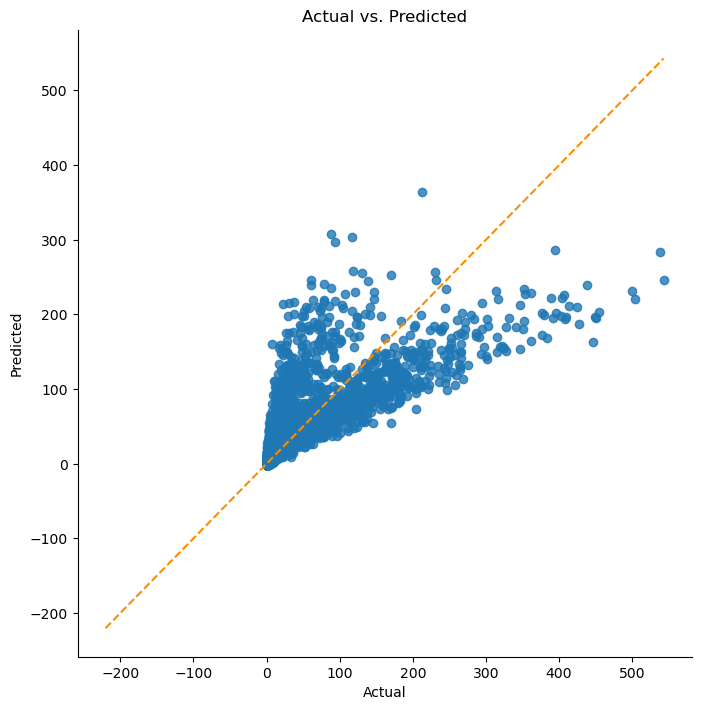

In [33]:
linear_assumption(model, X, y)

In [34]:
## Checking assumptions - normality of error terms

def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


C:\Users\Admin\AppData\Local\Temp\ipykernel_2440\503198179.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_results['Residuals'])


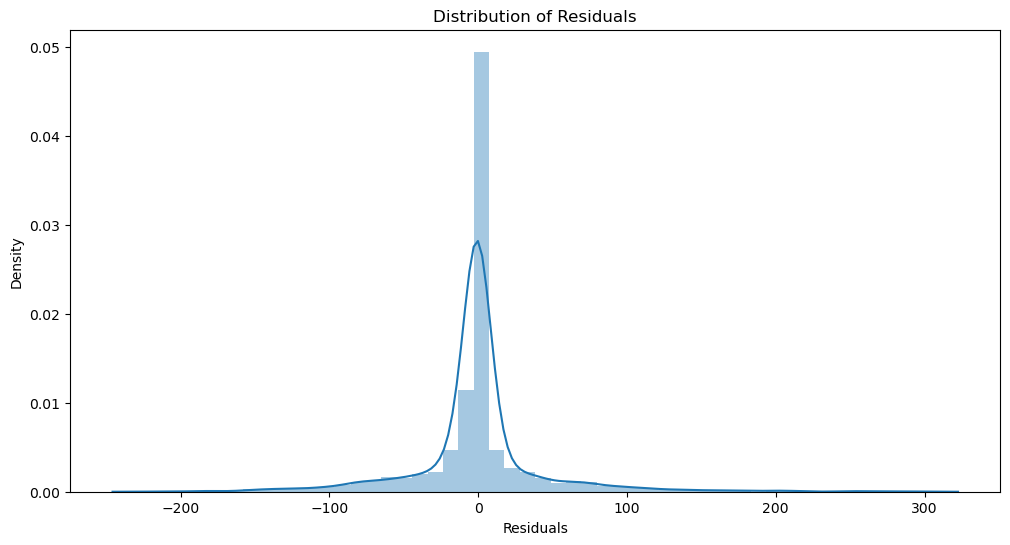


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [35]:
normal_errors_assumption(model, X, y)

In [36]:
## Checking assumptions - multicollinearity

def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

Assumption 3: Little to no multicollinearity among predictors


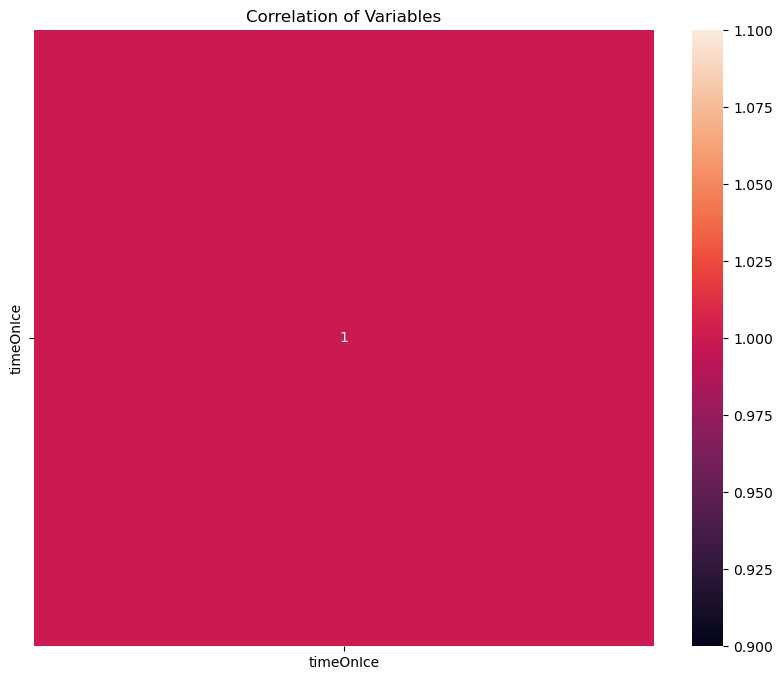

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------


ValueError: zero-size array to reduction operation maximum which has no identity

In [47]:
multicollinearity_assumption(model, X, y)

In [38]:
## Checking assumptions - autocorrelation

def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [39]:
autocorrelation_assumption(model, X, y)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9093676655823315
Little to no autocorrelation 

Assumption satisfied


In [40]:
## Checking assumptions - homoscedasticity

def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


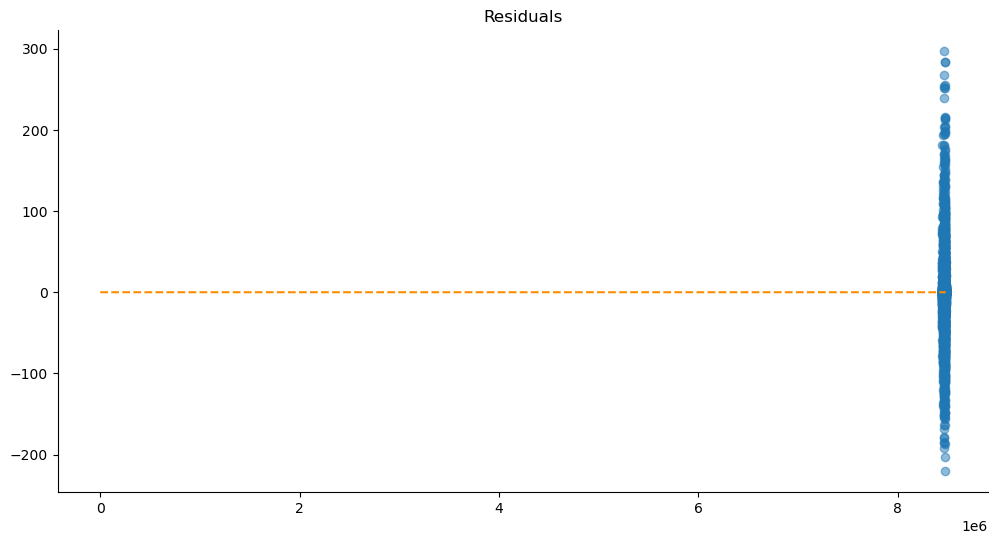

In [41]:
homoscedasticity_assumption(model, X, y)

In [48]:
df_skaters_toi.head()

,timeOnIce,goals
player_id,,
8444894,51806,11
8444919,232930,4
8445000,322029,88
8445176,214915,59
8445266,329428,7


In [65]:
## Clustering defence and forwards using k-means

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df_skaters_toi[['timeOnIce', 'goals']]

scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(features_normalized)

# Accessing cluster centroids and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Adding cluster labels to the DataFrame
df_skaters_toi['cluster_label'] = labels

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,timeOnIce,goals,cluster_label
player_id,,,
8444894,51806,11,0
8444919,232930,4,0
8445000,322029,88,0
8445176,214915,59,0
8445266,329428,7,0
...,...,...,...
8481642,894,0,0
8481649,6326,0,0
8481650,21968,2,0


In [68]:
# Visualising new clusters

alt.Chart(df_skaters_toi).mark_point().encode(
    alt.X('timeOnIce:Q', title='Time On Ice'),
    alt.Y('goals:Q', title='Goals'),
    color='cluster_label:N'
).properties(
    title='Relationship Between Goals and Time on Ice',
    height=400,
    width=400
)

alt.Chart(...)

In [70]:
# Add position into data frame and re-run regression

df_skaters_pos = df_skaters[['player_id', 'timeOnIce', 'goals']]

df_skaters_id = pd.read_csv('C:/Users/Admin/Desktop/Career/NHL Project/Project/data/player_info.csv')

In [90]:
df_skaters_pos = df_skaters_pos.merge(df_skaters_id[['player_id', 'firstName', 'lastName', 'primaryPosition']], left_on='player_id', right_on='player_id', how='outer')

In [92]:
df_skaters_pos = df_skaters_pos.groupby('player_id').agg({
    'timeOnIce': 'sum',
    'goals': 'sum',
    'firstName': 'first',
    'lastName': 'first',
    'primaryPosition': 'first'
}).reset_index()

In [109]:
# Extracting features and target variable
X = pd.get_dummies(df_skaters_pos[['timeOnIce', 'primaryPosition']], columns=['primaryPosition'])
X = X.drop(columns=['primaryPosition_G'])
y = df_skaters_pos['goals']

# Instantiate the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-Squared:", model.score(X,y))

Coefficient (slope): 0.00017011627963481793
Intercept: 3.360867140145274e-12
R-Squared: 0.7078324752872012


In [116]:
df_skaters_pos_noG = df_skaters_pos[df_skaters_pos['primaryPosition'] != 'G']

In [120]:
# Visualize with position

alt.Chart(df_skaters_pos_noG).mark_point().encode(
    alt.X('timeOnIce:Q', title='Time On Ice'),
    alt.Y('goals:Q', title='Goals'),
    color='primaryPosition:N'
).properties(
    title='Relationship Between Goals and Time on Ice',
    height=400,
    width=400
)

alt.Chart(...)

In [121]:
# Applying square root transform to feature

df_skaters_pos['timeOnIce_sqrt'] = np.sqrt(df_skaters_pos['timeOnIce'])

# Extracting features and target variable
X = pd.get_dummies(df_skaters_pos[['timeOnIce_sqrt', 'primaryPosition']], columns=['primaryPosition'])
X = X.drop(columns=['primaryPosition_G'])
y = df_skaters_pos['goals']

# Instantiate the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-Squared:", model.score(X,y))

Coefficient (slope): 0.16649441922873331
Intercept: 1.1112888387287967e-11
R-Squared: 0.6352336498953763


In [134]:
# Separate into forwards and defence

df_skaters_pos_noG['position'] = \
    np.where((df_skaters_pos_noG['primaryPosition'] == 'LW') | \
    (df_skaters_pos_noG['primaryPosition'] == 'RW') | \
    (df_skaters_pos_noG['primaryPosition'] == 'C'), 'Forward', 'Defence')

C:\Users\Admin\AppData\Local\Temp\ipykernel_2440\1893011551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_skaters_pos_noG['position'] = np.where((df_skaters_pos_noG['primaryPosition'] == 'LW') | (df_skaters_pos_noG['primaryPosition'] == 'RW') \


In [188]:
from sklearn.linear_model import LinearRegression

# Separate data for forwards and defensemen
forward = df_skaters_pos_noG[df_skaters_pos_noG['position'] == 'Forward']
forward_toi = forward['timeOnIce'].values.reshape(-1, 1)

defence = df_skaters_pos_noG[df_skaters_pos_noG['position'] == 'Defence']
defence_toi = defence['timeOnIce'].values.reshape(-1, 1)

# Instantiate the models
model_forward = LinearRegression()
model_defence = LinearRegression()

# Fit the models
model_forward.fit(forward_toi, forward['goals'])
model_defence.fit(defence_toi, defence['goals'])

# Print the coefficients and R-squared values
print("Forward Model:")
print("Coefficient (slope):", model_forward.coef_[0])
print("Intercept:", model_forward.intercept_)
print("R-Squared:", model_forward.score(forward_toi, forward['goals']))

print("\nDefence Model:")
print("Coefficient (slope):", model_defence.coef_[0])
print("Intercept:", model_defence.intercept_)
print("R-Squared:", model_defence.score(defence_toi, defence['goals']))

Forward Model:
Coefficient (slope): 0.00025439216251755886
Intercept: -7.443296339334147
R-Squared: 0.8966993933544644

Defence Model:
Coefficient (slope): 6.645201510346841e-05
Intercept: -2.3694859183086656
R-Squared: 0.7523742161849243
